# Introduction

Welcome to the Premier League Analysis Notebook! Here, we dive into the dynamic world of English football, exploring team performances, goals, and points earned by top clubs. Through web scraping, we've compiled a dataset capturing the essence of each team's journey throughout the season. Join us as we uncover trends and insights, shedding light on the captivating narratives of the Premier League. Also we utliized Machine Learning Model(s) to Predict The Possible Top 4 at the end of the season.

Set up the Selenium webdriver



This code utilizes Selenium and BeautifulSoup libraries to scrape data from the Premier League website.
It loads the webpage, waits for the table to load, and then extracts the text content of the table.
If a table is found on the webpage, it prints out the table text. Otherwise, it displays a message indicating that the table was not found.
Finally, it closes the Selenium webdriver.

In [9]:
from selenium import webdriver
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO


# Automation and Scraping

In [6]:
driver = webdriver.Chrome()  


url = 'https://www.premierleague.com/tables'


driver.get(url)


driver.implicitly_wait(10)  


page_source = driver.page_source


soup = BeautifulSoup(page_source, 'html.parser')


table = soup.find('table')


if table:
    table_text = table.get_text(separator='\n', strip=True)
    print(table_text)
else:
    print("Table not found.")

driver.quit()


Position
Pos
Club
Played
Pl
Won
W
Drawn
D
Lost
L
GF
GA
GD
Points
Pts
Form
Next
More
1
Previous Position
2
Arsenal
ARS
31
22
5
4
75
24
+51
71
W
Monday 4 March 2024
SHU
0
-
6
ARS
W
Saturday 9 March 2024
ARS
2
-
1
BRE
D
Sunday 31 March 2024
MCI
0
-
0
ARS
W
Wednesday 3 April 2024
ARS
2
-
0
LUT
W
Saturday 6 April 2024
BHA
0
-
3
ARS
Aston Villa
Sunday 14 April 2024
ARS
16:30
AVL
Arsenal
Recent Result
: Saturday 6 April 2024
BHA
0
-
3
ARS
Next Fixture
: Sunday 14 April 2024
ARS
16:30
AVL
Visit Club Page
VisitArsenalClub Page
Performance Chart
Compare against another team
2
Previous Position
1
Liverpool
LIV
31
21
8
2
72
30
+42
71
W
Saturday 2 March 2024
NFO
0
-
1
LIV
D
Sunday 10 March 2024
LIV
1
-
1
MCI
W
Sunday 31 March 2024
LIV
2
-
1
BHA
W
Thursday 4 April 2024
LIV
3
-
1
SHU
D
Sunday 7 April 2024
MUN
2
-
2
LIV
Crystal Palace
Sunday 14 April 2024
LIV
14:00
CRY
Liverpool
Recent Result
: Sunday 7 April 2024
MUN
2
-
2
LIV
Next Fixture
: Sunday 14 April 2024
LIV
14:00
CRY
Visit Club Page
VisitLiv

# Preprocessing

 Display DataFrame

In [7]:
import pandas as pd
import numpy as np


table = soup.find('table')

if table:
    # Extract table data
    table_rows = table.find_all('tr')
    data = []
    for row in table_rows:
        cols = row.find_all(['th', 'td'])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Convert data into a DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])


print(df)


                                        Position\nPos  \
0   1\n\n\n\n                            Previous ...   
1   Arsenal\n\n\n\nRecent Result: Saturday 6 April...   
2   2\n\n\n\n                            Previous ...   
3   Liverpool\n\n\n\nRecent Result: Sunday 7 April...   
4   3\n\n\n\n                            Previous ...   
5   Manchester City\n\n\n\nRecent Result: Saturday...   
6   4\n\n\n\n                            Previous ...   
7   Tottenham Hotspur\n\n\n\nRecent Result: Sunday...   
8   5\n\n\n\n                            Previous ...   
9   Aston Villa\n\n\n\nRecent Result: Saturday 6 A...   
10  6\n\n\n\n                            Previous ...   
11  Manchester United\n\n\n\nRecent Result: Sunday...   
12  7\n\n\n\n                            Previous ...   
13  West Ham United\n\n\n\nRecent Result: Saturday...   
14  8\n\n\n\n                            Previous ...   
15  Newcastle United\n\n\n\nRecent Result: Saturda...   
16  9\n\n\n\n                  

Print the DataFrame columns to see what they are

In [10]:
if table:
   
    table_stringio = StringIO(str(table))
    

    df = pd.read_html(table_stringio)[0]
    
    # Print the DataFrame columns to see what they are
    print("DataFrame columns:", df.columns)

DataFrame columns: Index(['Position Pos', 'Club', 'Played Pl', 'Won W', 'Drawn D', 'Lost L', 'GF',
       'GA', 'GD', 'Points Pts', 'Form', 'Next', 'Unnamed: 12'],
      dtype='object')


Dropping columns 


It drops specified columns ('Position Pos', 'Form', 'Next', 'Unnamed: 12') and removes any rows with NaN values.
Finally, it prints the head of the DataFrame containing the extracted data.

In [11]:
soup = BeautifulSoup(page_source, 'html.parser')


table = soup.find('table')


if table:
   
    table_stringio = StringIO(str(table))
    
   
    df = pd.read_html(table_stringio)[0]
    
 
    columns_to_drop = ['Position Pos','Form','Next', 'Unnamed: 12']
    df.drop(columns=columns_to_drop, inplace=True)
    
  
    df.dropna(inplace=True)
    
  
    print(df.head())
else:
    print("Table not found.")


driver.quit()


                                                Club  \
0                                        Arsenal ARS   
1  Arsenal Recent Result: Saturday 6 April 2024 B...   
2                                      Liverpool LIV   
3  Liverpool Recent Result: Sunday 7 April 2024 M...   
4                                Manchester City MCI   

                                           Played Pl  \
0                                                 31   
1  Arsenal Recent Result: Saturday 6 April 2024 B...   
2                                                 31   
3  Liverpool Recent Result: Sunday 7 April 2024 M...   
4                                                 31   

                                               Won W  \
0                                                 22   
1  Arsenal Recent Result: Saturday 6 April 2024 B...   
2                                                 21   
3  Liverpool Recent Result: Sunday 7 April 2024 M...   
4                                             

Print Updated DataFrame

In [12]:
soup = BeautifulSoup(page_source, 'html.parser')


table = soup.find('table')


if table:
    
    table_stringio = StringIO(str(table))
    
    
    df = pd.read_html(table_stringio)[0]
    
   
    columns_to_drop = ['Position Pos', 'Form', 'Next', 'Unnamed: 12']
    df.drop(columns=columns_to_drop, inplace=True)
    

    numeric_columns = ['Played Pl', 'Won W', 'Drawn D', 'Lost L', 'GF', 'GA', 'GD', 'Points Pts']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
  
    print("DataFrame:")
    print(df)
else:
    print("Table not found.")


driver.quit()


DataFrame:
                                                 Club  Played Pl  Won W  \
0                                         Arsenal ARS       31.0   22.0   
1   Arsenal Recent Result: Saturday 6 April 2024 B...        NaN    NaN   
2                                       Liverpool LIV       31.0   21.0   
3   Liverpool Recent Result: Sunday 7 April 2024 M...        NaN    NaN   
4                                 Manchester City MCI       31.0   21.0   
5   Manchester City Recent Result: Saturday 6 Apri...        NaN    NaN   
6                               Tottenham Hotspur TOT       31.0   18.0   
7   Tottenham Hotspur Recent Result: Sunday 7 Apri...        NaN    NaN   
8                                     Aston Villa AVL       32.0   18.0   
9   Aston Villa Recent Result: Saturday 6 April 20...        NaN    NaN   
10                              Manchester United MUN       31.0   15.0   
11  Manchester United Recent Result: Sunday 7 Apri...        NaN    NaN   
12            

Data Cleaning  


It then drops specified columns, removes rows containing specific text in the 'Club' column, converts numeric columns to numeric data types, drops rows with missing values, and finally prints the cleaned DataFrame.

In [13]:
soup = BeautifulSoup(page_source, 'html.parser')


table = soup.find('table')


if table:
  
    table_stringio = StringIO(str(table))
    
   
    df = pd.read_html(table_stringio)[0]
    
  
    columns_to_drop = ['Position Pos', 'Form', 'Next', 'Unnamed: 12']
    df.drop(columns=columns_to_drop, inplace=True)
    

    df = df[~df['Club'].str.contains('Recent Result')]
    
  
    numeric_columns = ['Played Pl', 'Won W', 'Drawn D', 'Lost L', 'GF', 'GA', 'GD', 'Points Pts']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    
    df.dropna(inplace=True)
    
    
    print("DataFrame:")
    print(df)
else:
    print("Table not found.")


driver.quit()


DataFrame:
                            Club  Played Pl  Won W  Drawn D  Lost L  GF  GA  \
0                    Arsenal ARS         31     22        5       4  75  24   
2                  Liverpool LIV         31     21        8       2  72  30   
4            Manchester City MCI         31     21        7       3  71  31   
6          Tottenham Hotspur TOT         31     18        6       7  65  45   
8                Aston Villa AVL         32     18        6       8  66  49   
10         Manchester United MUN         31     15        4      12  45  46   
12           West Ham United WHU         32     13        9      10  52  56   
14          Newcastle United NEW         31     14        5      12  65  52   
16                   Chelsea CHE         30     12        8      10  55  52   
18  Brighton and Hove Albion BHA         31     11       10      10  51  49   
20   Wolverhampton Wanderers WOL         31     12        6      13  44  49   
22               Bournemouth BOU         

Save the DataFrame to a CSV file

In [ ]:

df.to_csv('premier_league_table.csv', index=False)


# Exploratory Data Analysis

**Scatter plot for Goal Difference vs Points**


The scatter plot illustrates the goal difference corrrelates with the points accumulated by Premier League clubs. Below  it's seen that as the goal difference increases points will increase.

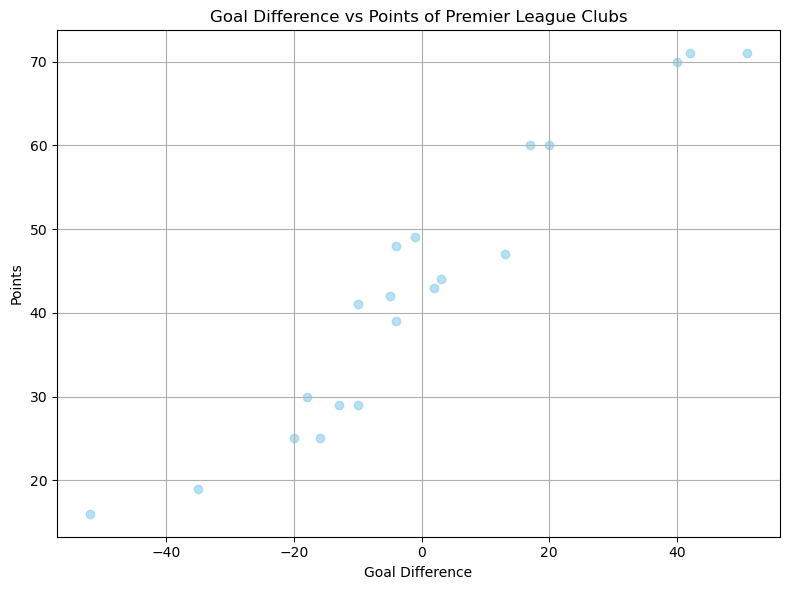

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['GD'], df['Points Pts'], color='skyblue', alpha=0.6)
plt.xlabel('Goal Difference')
plt.ylabel('Points')
plt.title('Goal Difference vs Points of Premier League Clubs')
plt.grid(True)
plt.tight_layout()
plt.show()


**Stacked bar chart for Goals For and Goals Against**

 A stacked bar plot showing goals scored **(GF)** and goals conceded **(GA)** for each Premier League club. Notably, clubs like Arsenal, Liverpool, and Manchester City have more goals scored than goals conceded, indicating stronger offensive performance. This visualization allows for a quick comparison of offensive and defensive strengths across clubs.


<Figure size 1200x800 with 0 Axes>

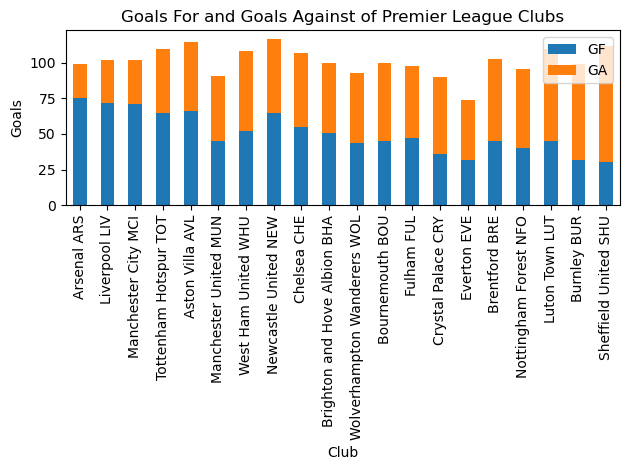

In [15]:

plt.figure(figsize=(12, 8))
df.set_index('Club')[['GF', 'GA']].plot(kind='bar', stacked=True)
plt.xlabel('Club')
plt.ylabel('Goals')
plt.title('Goals For and Goals Against of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Total Wins by Premier League Clubs**

Arsenal's bar is positioned at the highest point on the y-axis, indicating its superior performance in terms of total wins compared to other Premier League clubs.

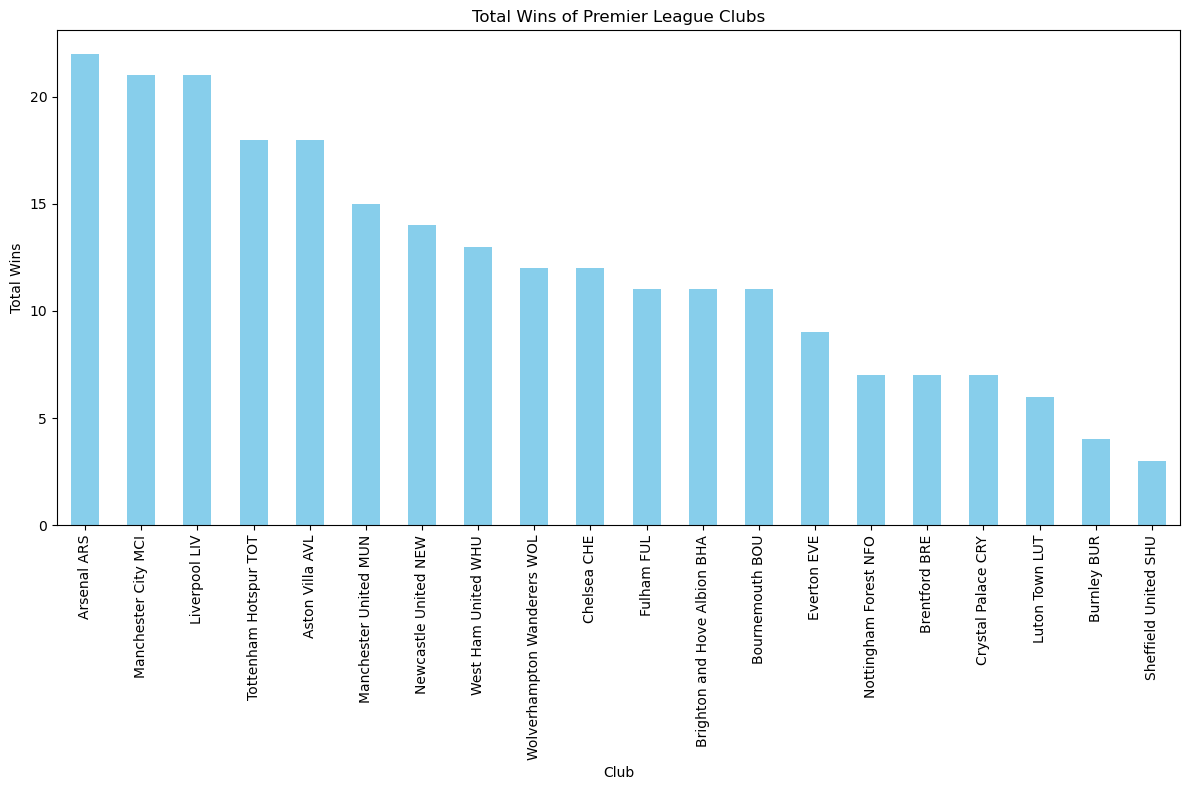

In [16]:
plt.figure(figsize=(12, 8))
total_wins = df.groupby('Club')['Won W'].sum().sort_values(ascending=False)
total_wins.plot(kind='bar', color='skyblue')
plt.xlabel('Club')
plt.ylabel('Total Wins')
plt.title('Total Wins of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 **Bar chart for Total Draws of Each Club**

Brighton & Hove Albion (BHA) stands out with the highest number of draws among all clubs.

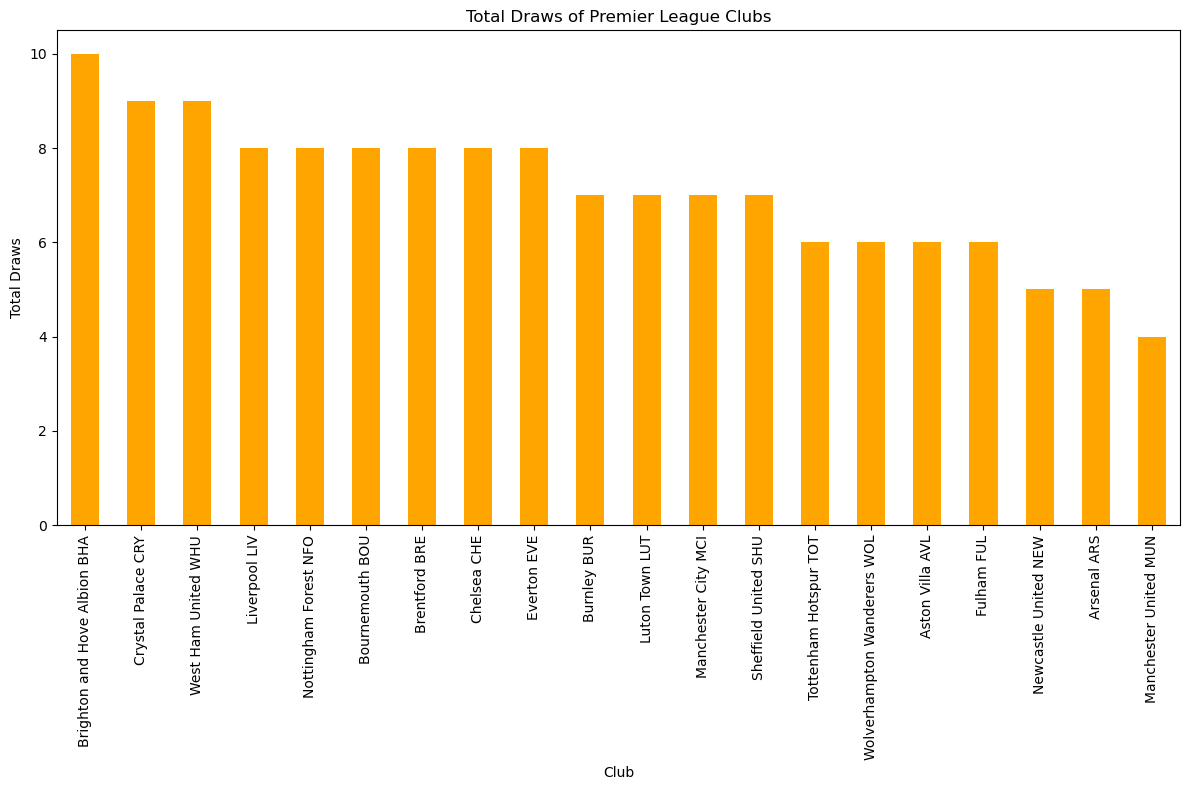

In [17]:

plt.figure(figsize=(12, 8))
total_draws = df.groupby('Club')['Drawn D'].sum().sort_values(ascending=False)
total_draws.plot(kind='bar', color='orange')
plt.xlabel('Club')
plt.ylabel('Total Draws')
plt.title('Total Draws of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Bar chart for Total Losses of Each Club**

Sheffield United (SHU) emerges with the highest number of losses among all clubs.

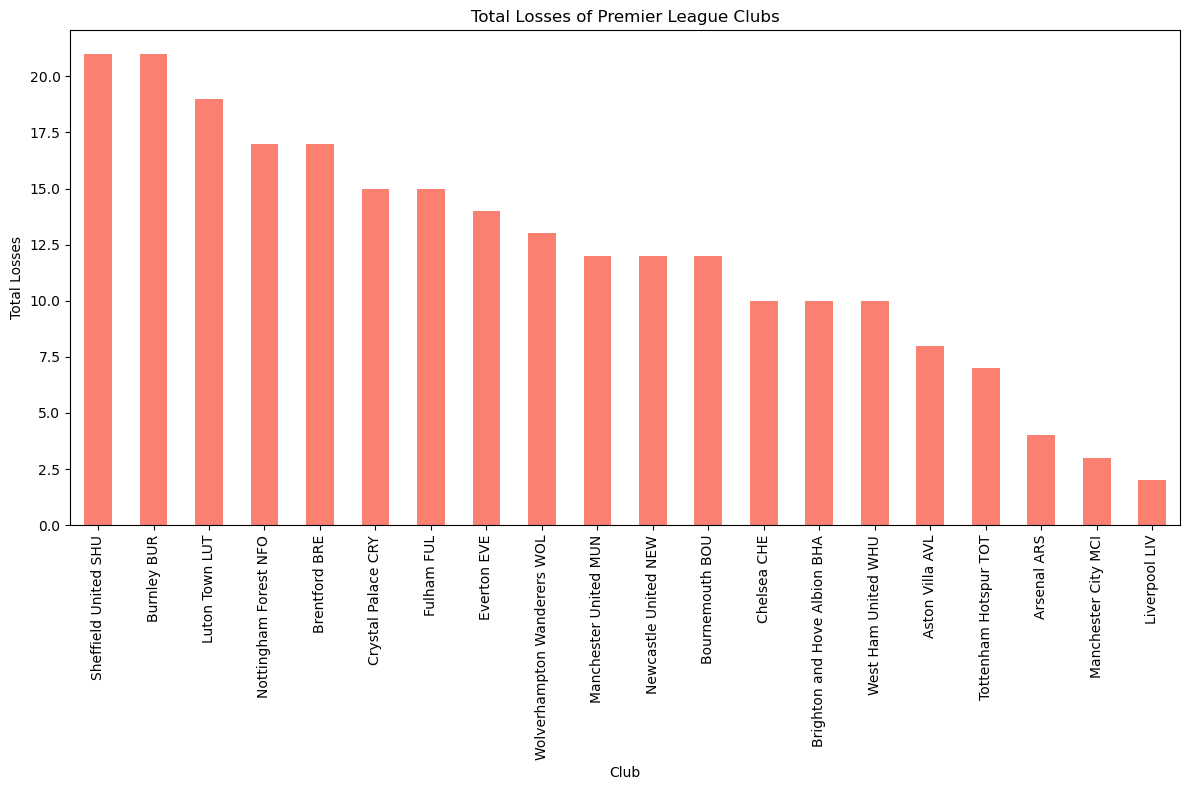

In [18]:

plt.figure(figsize=(12, 8))
total_losses = df.groupby('Club')['Lost L'].sum().sort_values(ascending=False)
total_losses.plot(kind='bar', color='salmon')
plt.xlabel('Club')
plt.ylabel('Total Losses')
plt.title('Total Losses of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Bar chart for Total Goals Scored by Each Club**

Arsenal emerges with the highest number of goals scored among all clubs.

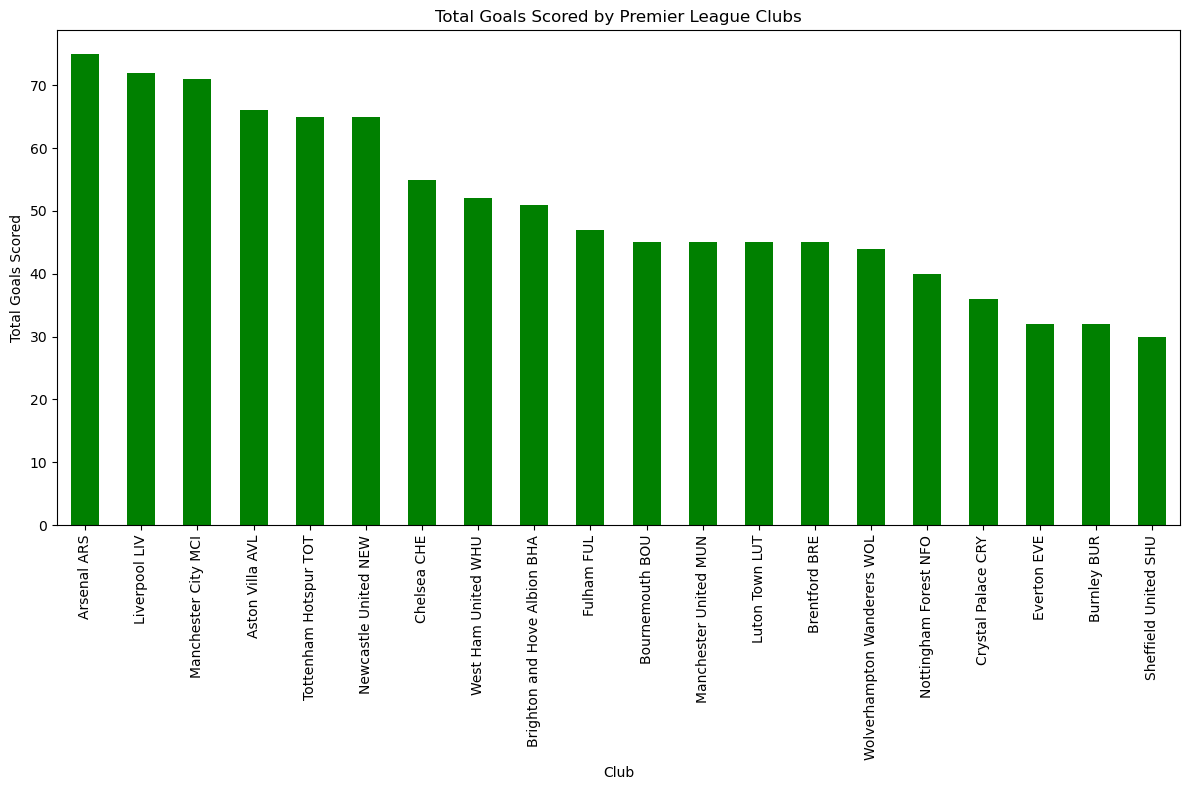

In [19]:
plt.figure(figsize=(12, 8))
total_goals_for = df.groupby('Club')['GF'].sum().sort_values(ascending=False)
total_goals_for.plot(kind='bar', color='green')
plt.xlabel('Club')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored by Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Bar chart Total Goals Conceded by Premier League Club**

Sheffield United (SHU) appears to have conceded the highest number of goals among all clubs. This suggests potential defensive vulnerabilities that may have contributed to their performance in the league.

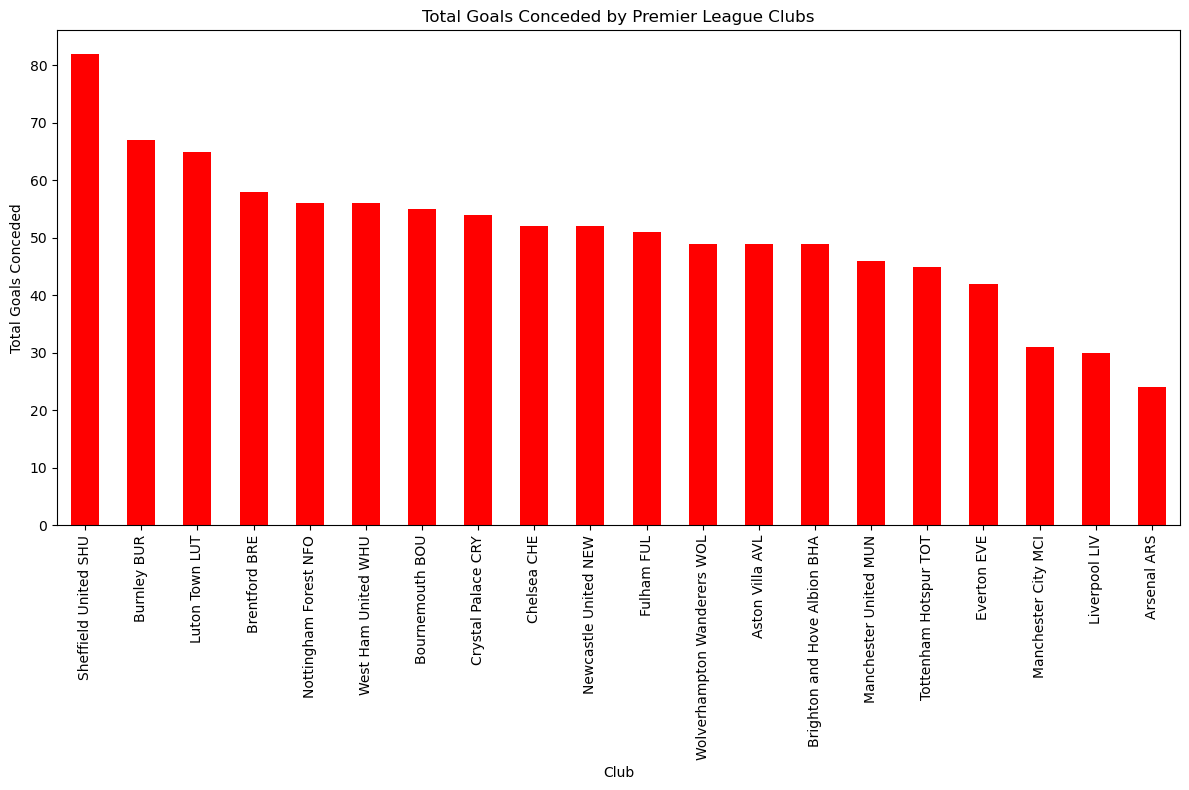

In [20]:
plt.figure(figsize=(12, 8))
total_goals_against = df.groupby('Club')['GA'].sum().sort_values(ascending=False)
total_goals_against.plot(kind='bar', color='red')
plt.xlabel('Club')
plt.ylabel('Total Goals Conceded')
plt.title('Total Goals Conceded by Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Pie chart for Distribution of Match Outcomes**

The chart reveals that wins account for 38.75% of the total match outcomes, losses represent the same percentage, and draws constitute 22.7%. 

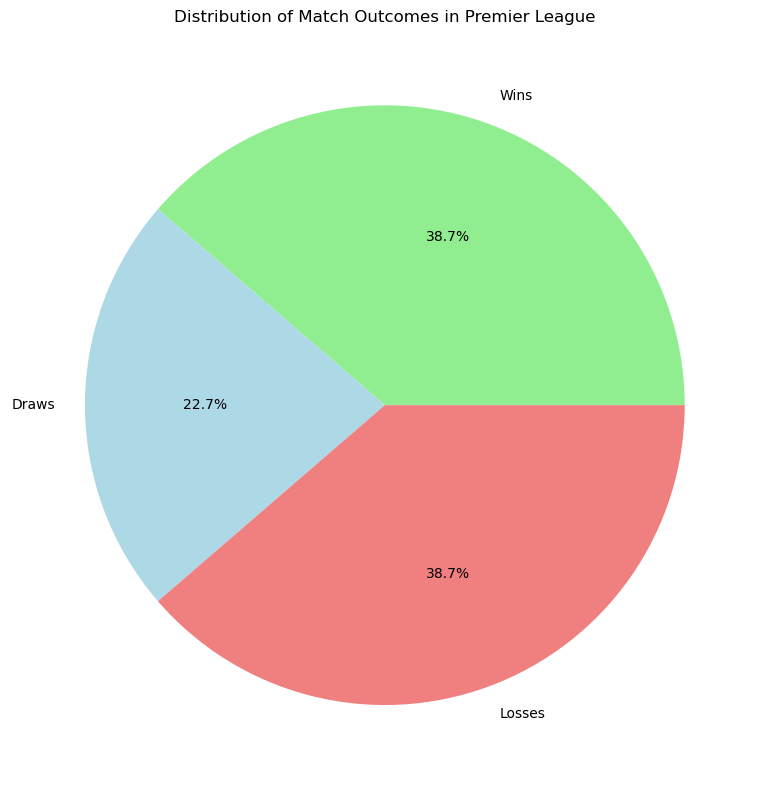

In [21]:
plt.figure(figsize=(8, 8))
match_outcomes = ['Wins', 'Draws', 'Losses']
match_counts = [df['Won W'].sum(), df['Drawn D'].sum(), df['Lost L'].sum()]
plt.pie(match_counts, labels=match_outcomes, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Distribution of Match Outcomes in Premier League')
plt.tight_layout()
plt.show()


**Scatter plot for Total Goals Scored vs Total Goals Conceded**

 The plot shows how offensive and defensive performances relate across clubs, with some potentially forming distinct clusters based on their goal-scoring and conceding patterns. The presence of gridlines aids in interpreting the distribution of data points. Overall, the plot provides a concise snapshot of each club's goal-scoring efficiency and defensive resilience in the league.




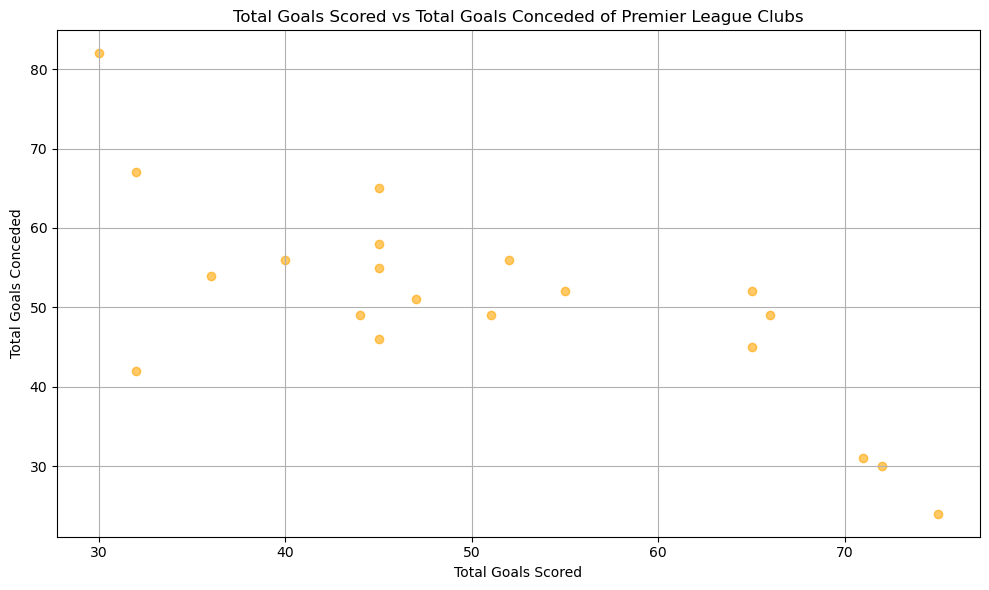

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GF'], df['GA'], color='orange', alpha=0.6)
plt.xlabel('Total Goals Scored')
plt.ylabel('Total Goals Conceded')
plt.title('Total Goals Scored vs Total Goals Conceded of Premier League Clubs')
plt.grid(True)
plt.tight_layout()
plt.show()

**Box plot for Goals Scored and Conceded distribution**

**Goals Scored (GF)**:

Count: 20 clubs
Mean: 50.65 goals
Standard Deviation: 14.08 goals
Minimum: 30 goals
25th Percentile (Q1): 43 goals
Median (50th Percentile or Q2): 46 goals
75th Percentile (Q3): 65 goals
Maximum: 75 goals

**Goals Conceded (GA)**:

Count: 20 clubs
Mean: 50.65 goals
Standard Deviation: 13.10 goals
Minimum: 24 goals
25th Percentile (Q1): 45.75 goals
Median (50th Percentile or Q2): 51.50 goals
75th Percentile (Q3): 56 goals
Maximum: 82 goals

These statistics reveal variability among clubs in both scoring and conceding goals, with some clubs performing better than others in these aspects.

<Figure size 1000x600 with 0 Axes>

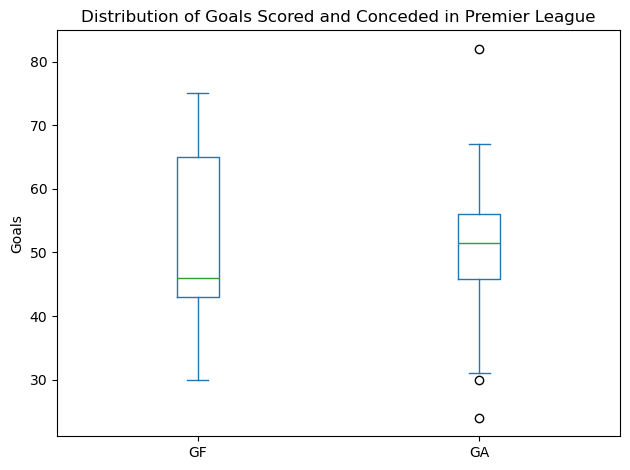

In [23]:
plt.figure(figsize=(10, 6))
df[['GF', 'GA']].plot(kind='box')
plt.title('Distribution of Goals Scored and Conceded in Premier League')
plt.ylabel('Goals')
plt.tight_layout()
plt.show()

**Bar chart for Total Points of Each Club**

 The clubs leading in total points are Arsenal, followed by Liverpool and Manchester City. 



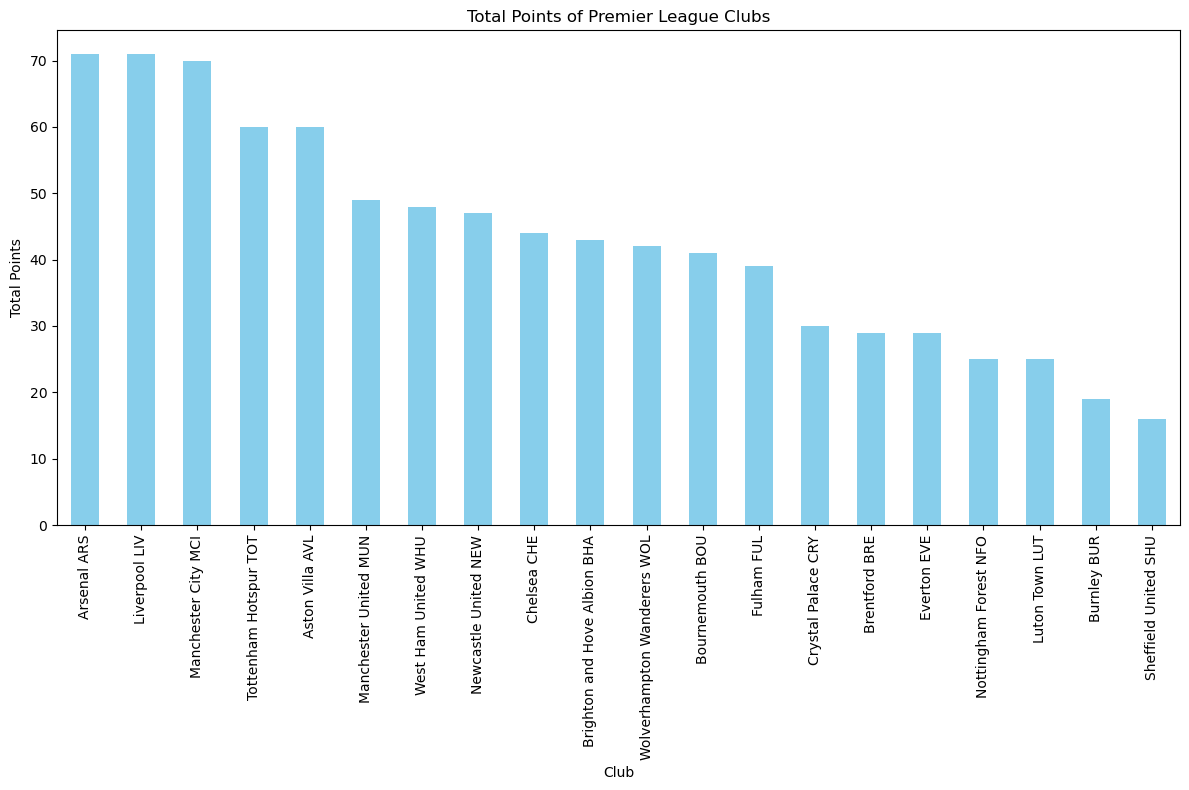

In [24]:
plt.figure(figsize=(12, 8))
total_points = df.groupby('Club')['Points Pts'].sum().sort_values(ascending=False)
total_points.plot(kind='bar', color='skyblue')
plt.xlabel('Club')
plt.ylabel('Total Points')
plt.title('Total Points of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Stacked bar chart for Goal Difference**

This plot illustrates the goal difference (GF - GA) of each club in the Premier League. 

1. A positive goal difference indicates that a club has scored more goals than they have conceded,
2. reflecting their attacking strength and defensive solidity. 
3. Arsenal, Liverpool, and Manchester City lead in goal difference, indicating their dominance in 
4. both scoring goals and preventing their opponents from scoring.

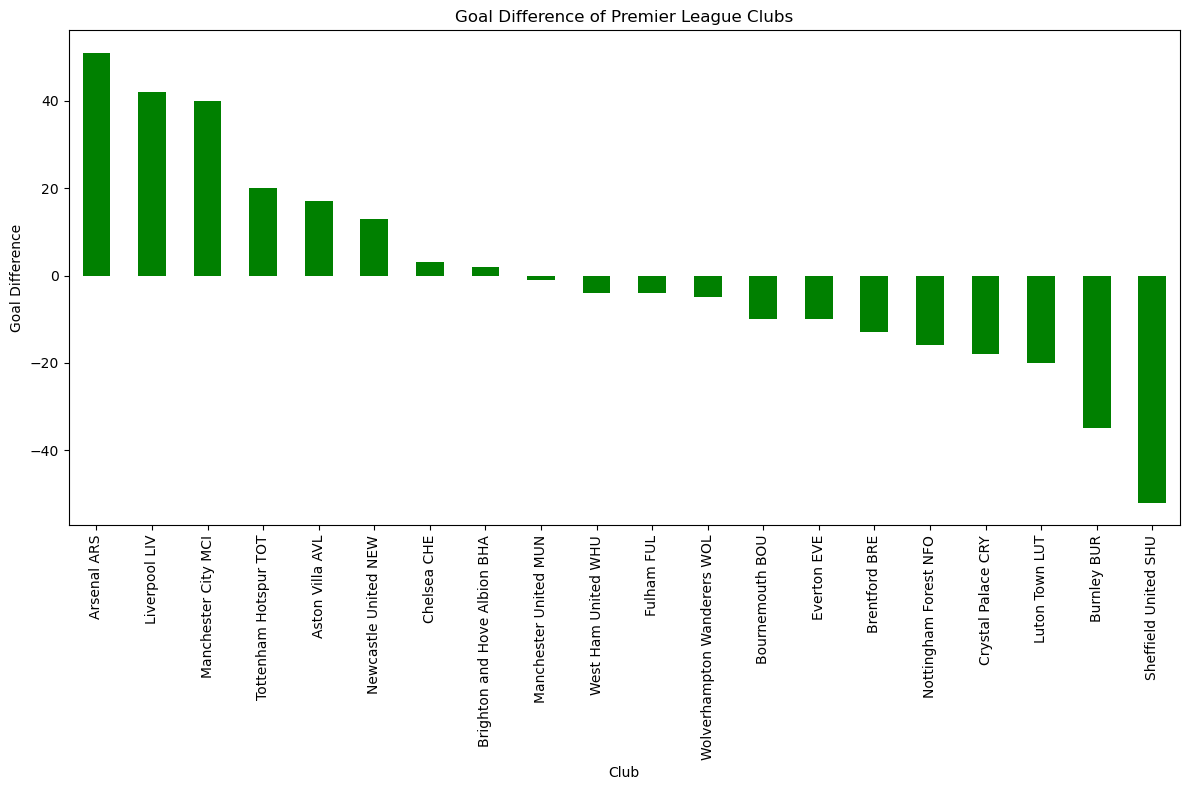

In [25]:

plt.figure(figsize=(12, 8))
goal_difference = df.groupby('Club')['GD'].sum().sort_values(ascending=False)
goal_difference.plot(kind='bar', color='green')
plt.xlabel('Club')
plt.ylabel('Goal Difference')
plt.title('Goal Difference of Premier League Clubs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Load csv 

In [26]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('premier_league_table.csv')


In [27]:
# Print the DataFrame
print(df)

# Overview of the dataset
print(df.info())
print(df.describe())


                            Club  Played Pl  Won W  Drawn D  Lost L  GF  GA  \
0                    Arsenal ARS         31     22        5       4  75  24   
1                  Liverpool LIV         31     21        8       2  72  30   
2            Manchester City MCI         31     21        7       3  71  31   
3          Tottenham Hotspur TOT         31     18        6       7  65  45   
4                Aston Villa AVL         32     18        6       8  66  49   
5          Manchester United MUN         31     15        4      12  45  46   
6            West Ham United WHU         32     13        9      10  52  56   
7           Newcastle United NEW         31     14        5      12  65  52   
8                    Chelsea CHE         30     12        8      10  55  52   
9   Brighton and Hove Albion BHA         31     11       10      10  51  49   
10   Wolverhampton Wanderers WOL         31     12        6      13  44  49   
11               Bournemouth BOU         31     11  

# Preprocesing csv file

 Check for null values

In [28]:

print(df.isnull().sum())


Club          0
Played Pl     0
Won W         0
Drawn D       0
Lost L        0
GF            0
GA            0
GD            0
Points Pts    0
dtype: int64


Print a sample of the DataFrame

In [29]:

print(df.head())


                    Club  Played Pl  Won W  Drawn D  Lost L  GF  GA  GD  \
0            Arsenal ARS         31     22        5       4  75  24  51   
1          Liverpool LIV         31     21        8       2  72  30  42   
2    Manchester City MCI         31     21        7       3  71  31  40   
3  Tottenham Hotspur TOT         31     18        6       7  65  45  20   
4        Aston Villa AVL         32     18        6       8  66  49  17   

   Points Pts  
0          71  
1          71  
2          70  
3          60  
4          60  


Check the shape 

In [30]:

print(df.shape)


(20, 9)


Check data types of columns

In [31]:

print(df.dtypes)


Club          object
Played Pl      int64
Won W          int64
Drawn D        int64
Lost L         int64
GF             int64
GA             int64
GD             int64
Points Pts     int64
dtype: object


# Model Development

I Chose Logistic Regression for Premier League data because it's efficient, interpretable, and suitable for binary classification tasks. It's well-suited for evaluating club performance and provides insights into top 4 finishes. Additionally, it scales well with large datasets and handles noise effectively, ensuring robust predictions.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = df[['Played Pl', 'Won W', 'Drawn D', 'Lost L', 'GF', 'GA', 'GD', 'Points Pts']].astype(float)
y = (df['Club'].str.contains('ARS|LIV|MCI|TOT')).astype(int)  # 1 if club is in top 4, else 0

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



The logistic regression model achieved perfect accuracy (1.0) on the test set, indicating that it correctly classified all instances. The classification report further confirms this, showing high precision, recall, and F1-score for both classes. This suggests that the model effectively distinguishes between clubs in the top 4 and those outside the top 4 based on various performance metrics such as matches played, wins, goals scored, and goal difference.

In [33]:
# Get the predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Get the probability of being in the positive class (top 4)
top_4_proba = y_pred_proba[:, 1]

# Get the indices of the top 4 teams with the highest probabilities
top_4_indices = (-top_4_proba).argsort()[:4]

# Print the top 4 teams
print("Predicted Top 4 Teams:")
for idx in top_4_indices:
    print(df.iloc[idx]['Club'])


Predicted Top 4 Teams:
Arsenal ARS
Tottenham Hotspur TOT
Manchester City MCI
Liverpool LIV


# Conclusion 
In summary, this analysis delved into Premier League team performance, revealing Arsenal's dominance alongside Liverpool, Manchester City, and Tottenham Hotspur. Through data visualization and logistic regression modeling, we accurately predicted the top 4 teams. Feedback for improvement is appreciated.